In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
cwd = os.getcwd()
main_output_dir = os.path.join(cwd,'main_output_dir')

# get LAT data
LATdata_path = os.path.join(cwd,'Lattice_Data_5_821_dT1_with_CEM_6-8-10.dat')
LAT_alldata = np.genfromtxt(LATdata_path)
temp = LAT_alldata[:,0]
temp4 = np.power(temp,4)

# list of all dirs in main_output_dir
outputs_list = os.listdir(main_output_dir)

#intial
print('Options for variables to display')
print('T0, K, muBC, ad, w, p')
var_list = ['T0', 'K', 'muBC', 'ad', 'w', 'p']

# get y axis info and make list
y = input('Enter y axis variable: ')
if y not in var_list:
    sys.exit('not a valid variable. program terminated')
else:
    pass

# get y axis info and make list
y_label = y
ymin = float(input(f'Enter min value for {y}: '))
ymax = float(input(f'Enter max value for {y}: '))
yinc = float(input(f'Enter incremental step for {y}: '))
ypre = np.arange(float(ymin),float(ymax)+float(yinc),float(yinc))
yvals = []
for f in ypre:
    full_float_str = "%.4f" % f
    full_str = y+full_float_str
    yvals.append(full_str)

# get x axis info and make list
x = input('Enter x axis variable: ')
if x not in var_list:
    sys.exit('not a valid variable. program terminated')
else:
    pass
x_label = x
xmin = float(input(f'Enter min value for {x}: '))
xmax = float(input(f'Enter max value for {x}: '))
xinc = float(input(f'Enter incremental step for {x}: '))
xpre = np.arange(float(xmin),float(xmax)+float(xinc),float(xinc))
xvals = []
for f in xpre:
    full_float_str = "%.4f" % f
    full_str = x+full_float_str
    xvals.append(full_str)

# make complete list of all combinations. this list will be iterated for the plotting loop
complete_list = []
for y in yvals:
    for x in xvals:
        complete_list.append([y,x])

# number of coefficients to go up to
cnum = int(input("Up to and including which order coefficient?: "))

# reduce the number of output paths to only what's needed. this is to make iteration later shorter
reduced_outputs_list = []
for i in complete_list:
    yvar = i[0]
    xvar = i[1]
    for Files in outputs_list:
        if yvar in Files and xvar in Files:
            Files_path = os.path.join(main_output_dir, Files)
            for data in os.listdir(Files_path):
                if 'Ising' in data:
                    dataname = data
                    continue
                else:
                    continue
            ising_path = os.path.join(Files_path,dataname)
            reduced_outputs_list.append(ising_path)
            continue
        else:
            continue

Options for variables to display
T0, K, muBC, ad, w, p
Enter y axis variable: muBC
Enter min value for muBC: 350
Enter max value for muBC: 550
Enter incremental step for muBC: 50
Enter x axis variable: w
Enter min value for w: 1
Enter max value for w: 4
Enter incremental step for w: 1
Up to and including which order coefficient?: 8


-------------------------------------------------------------------------------


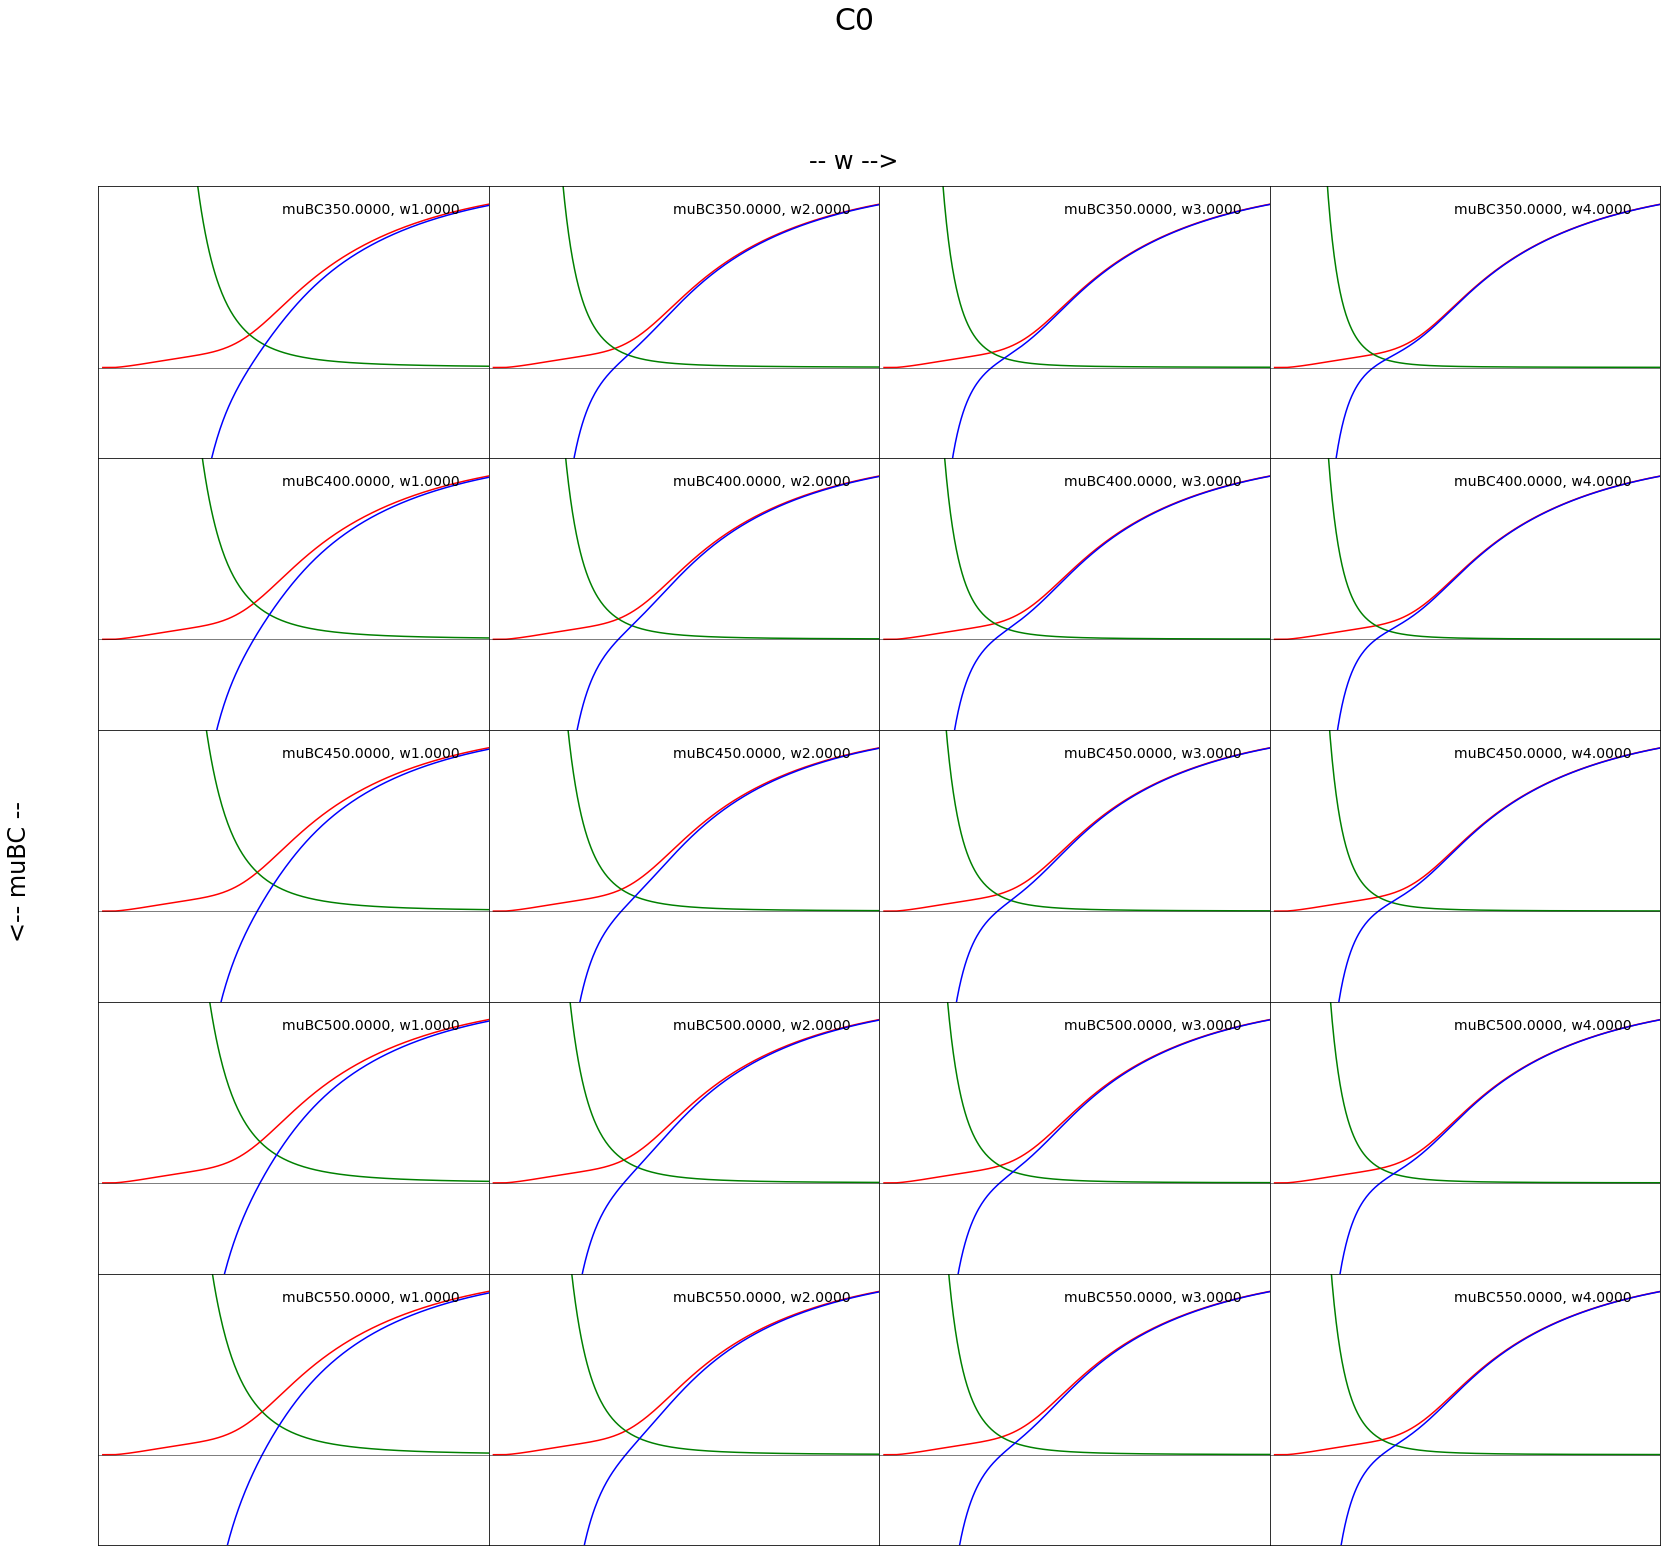

-------------------------------------------------------------------------------


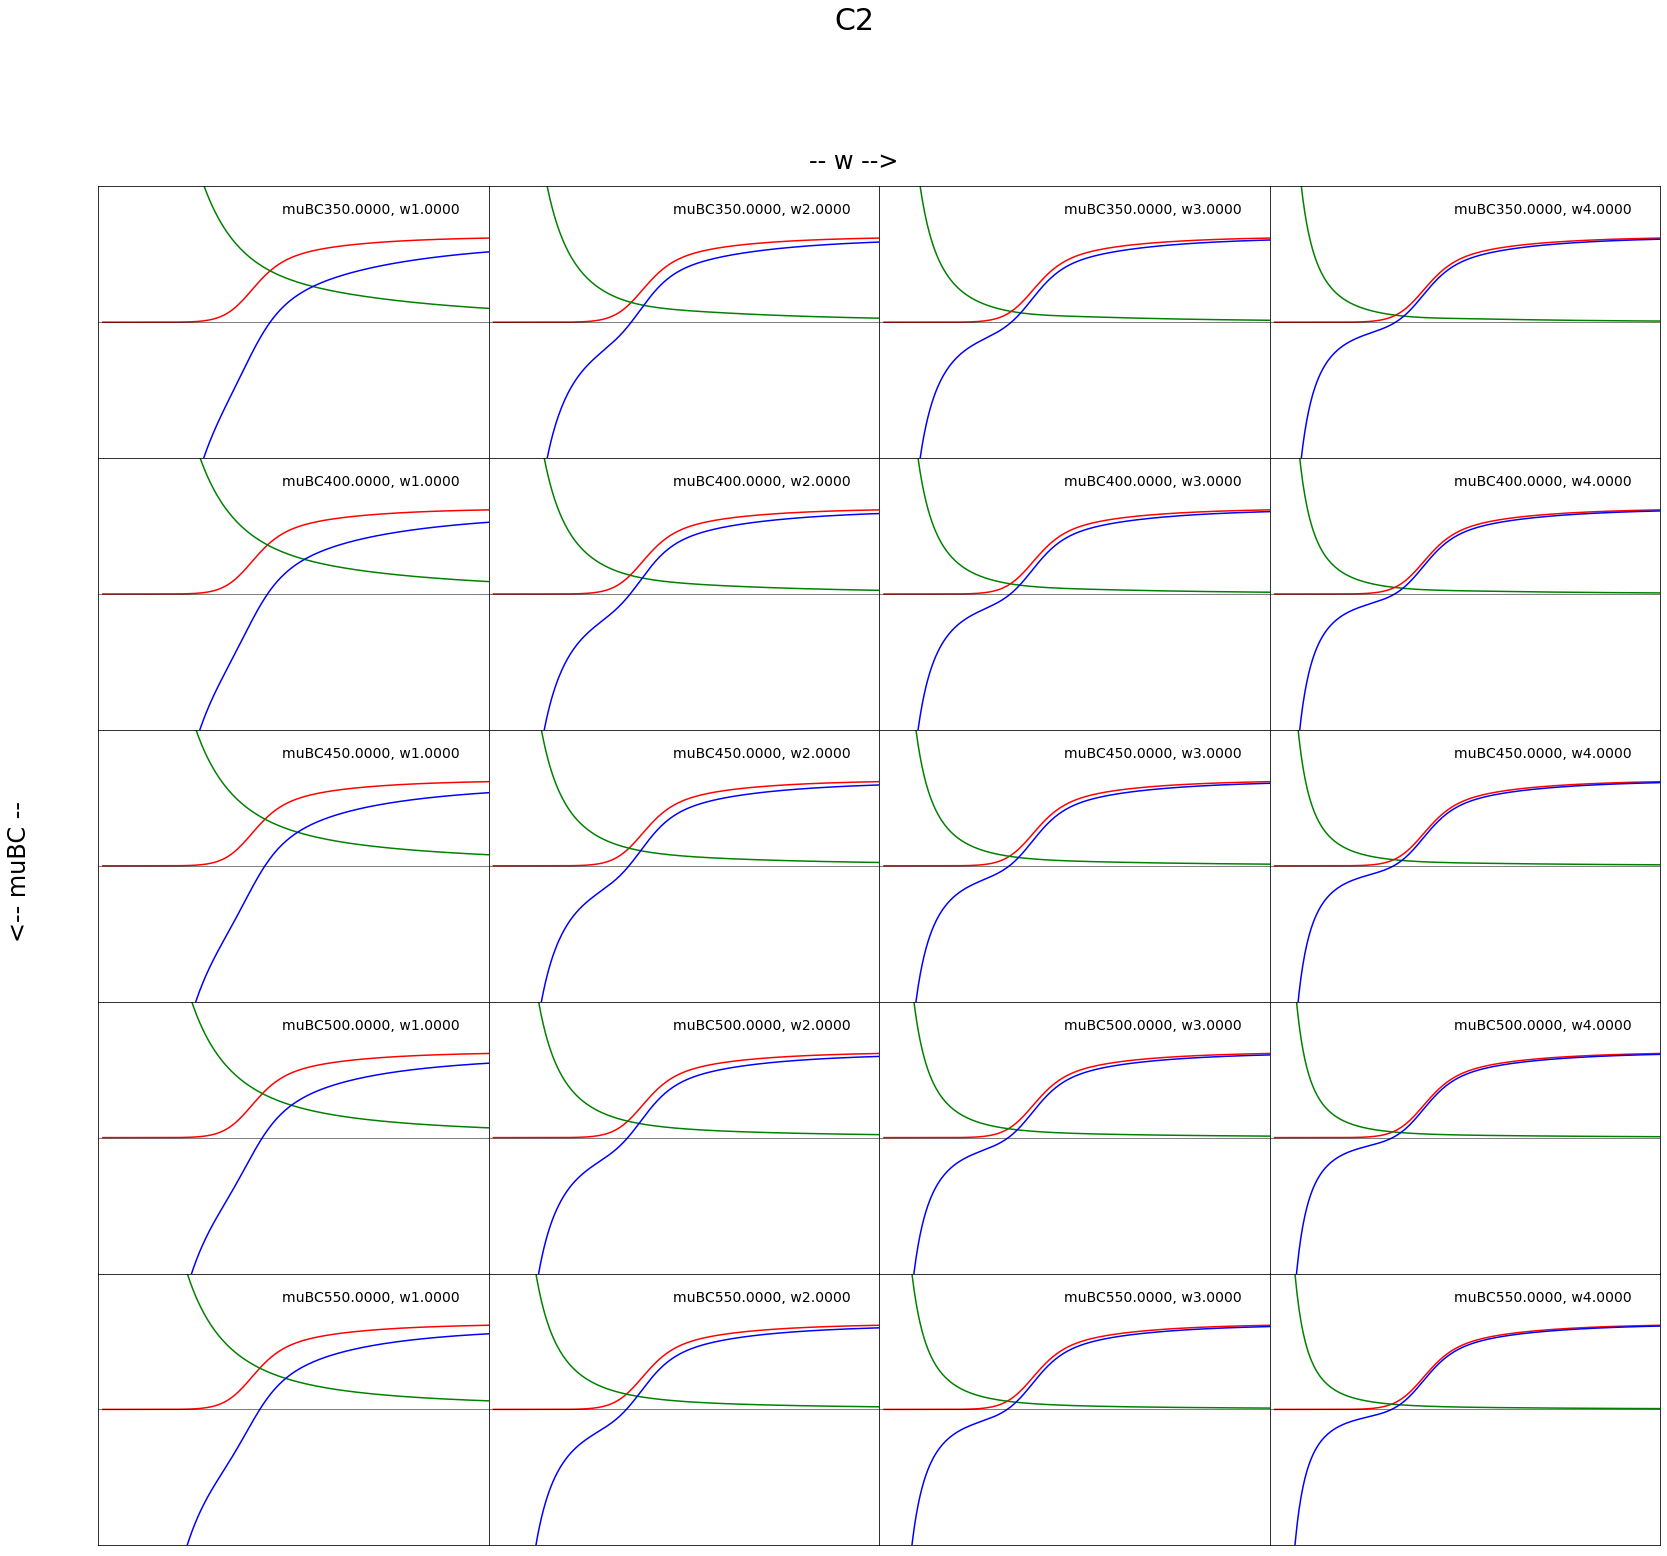

-------------------------------------------------------------------------------


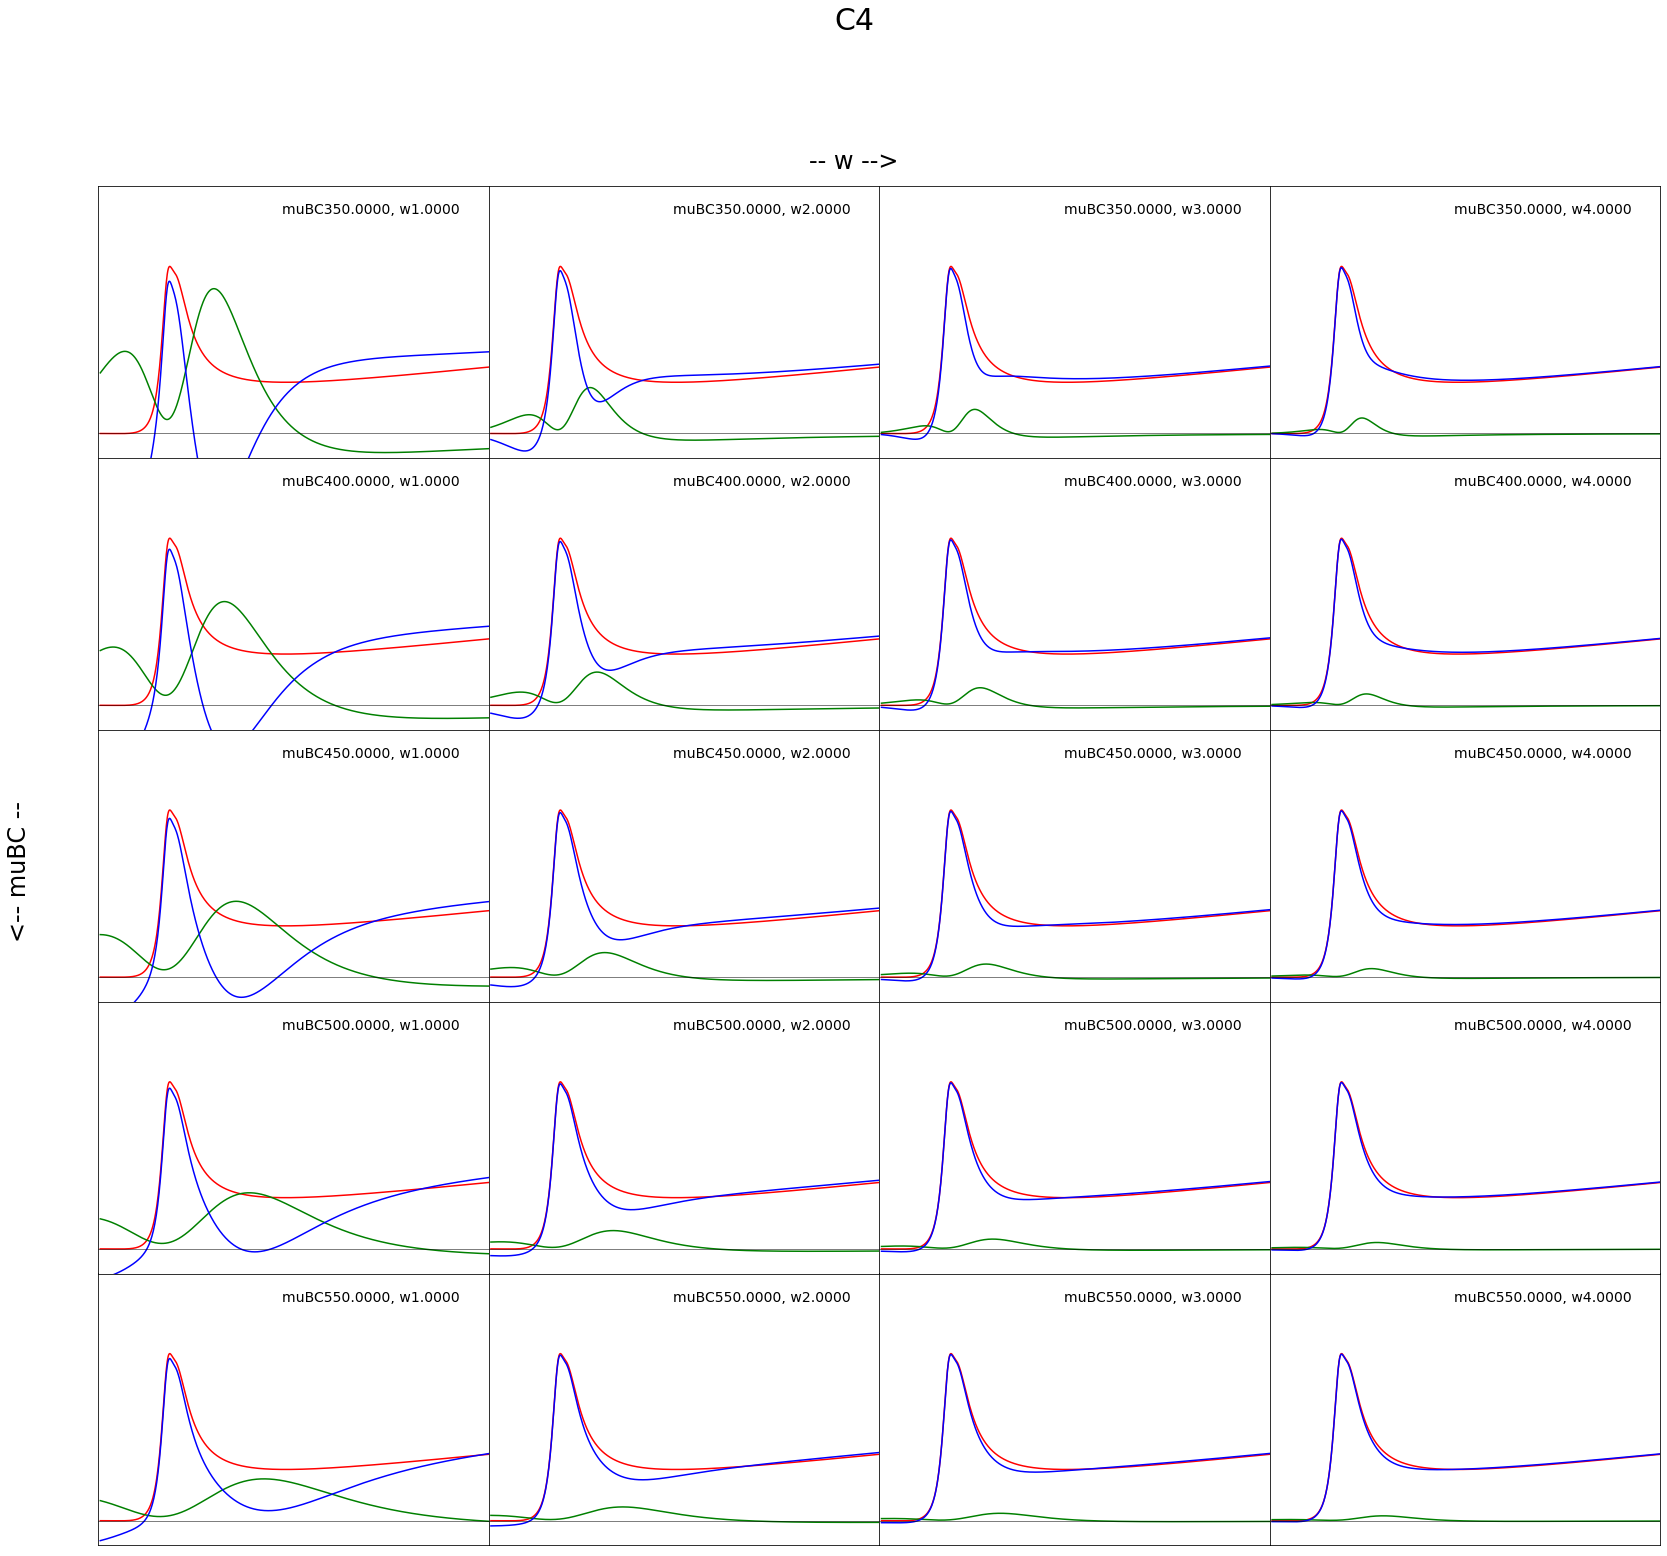

-------------------------------------------------------------------------------


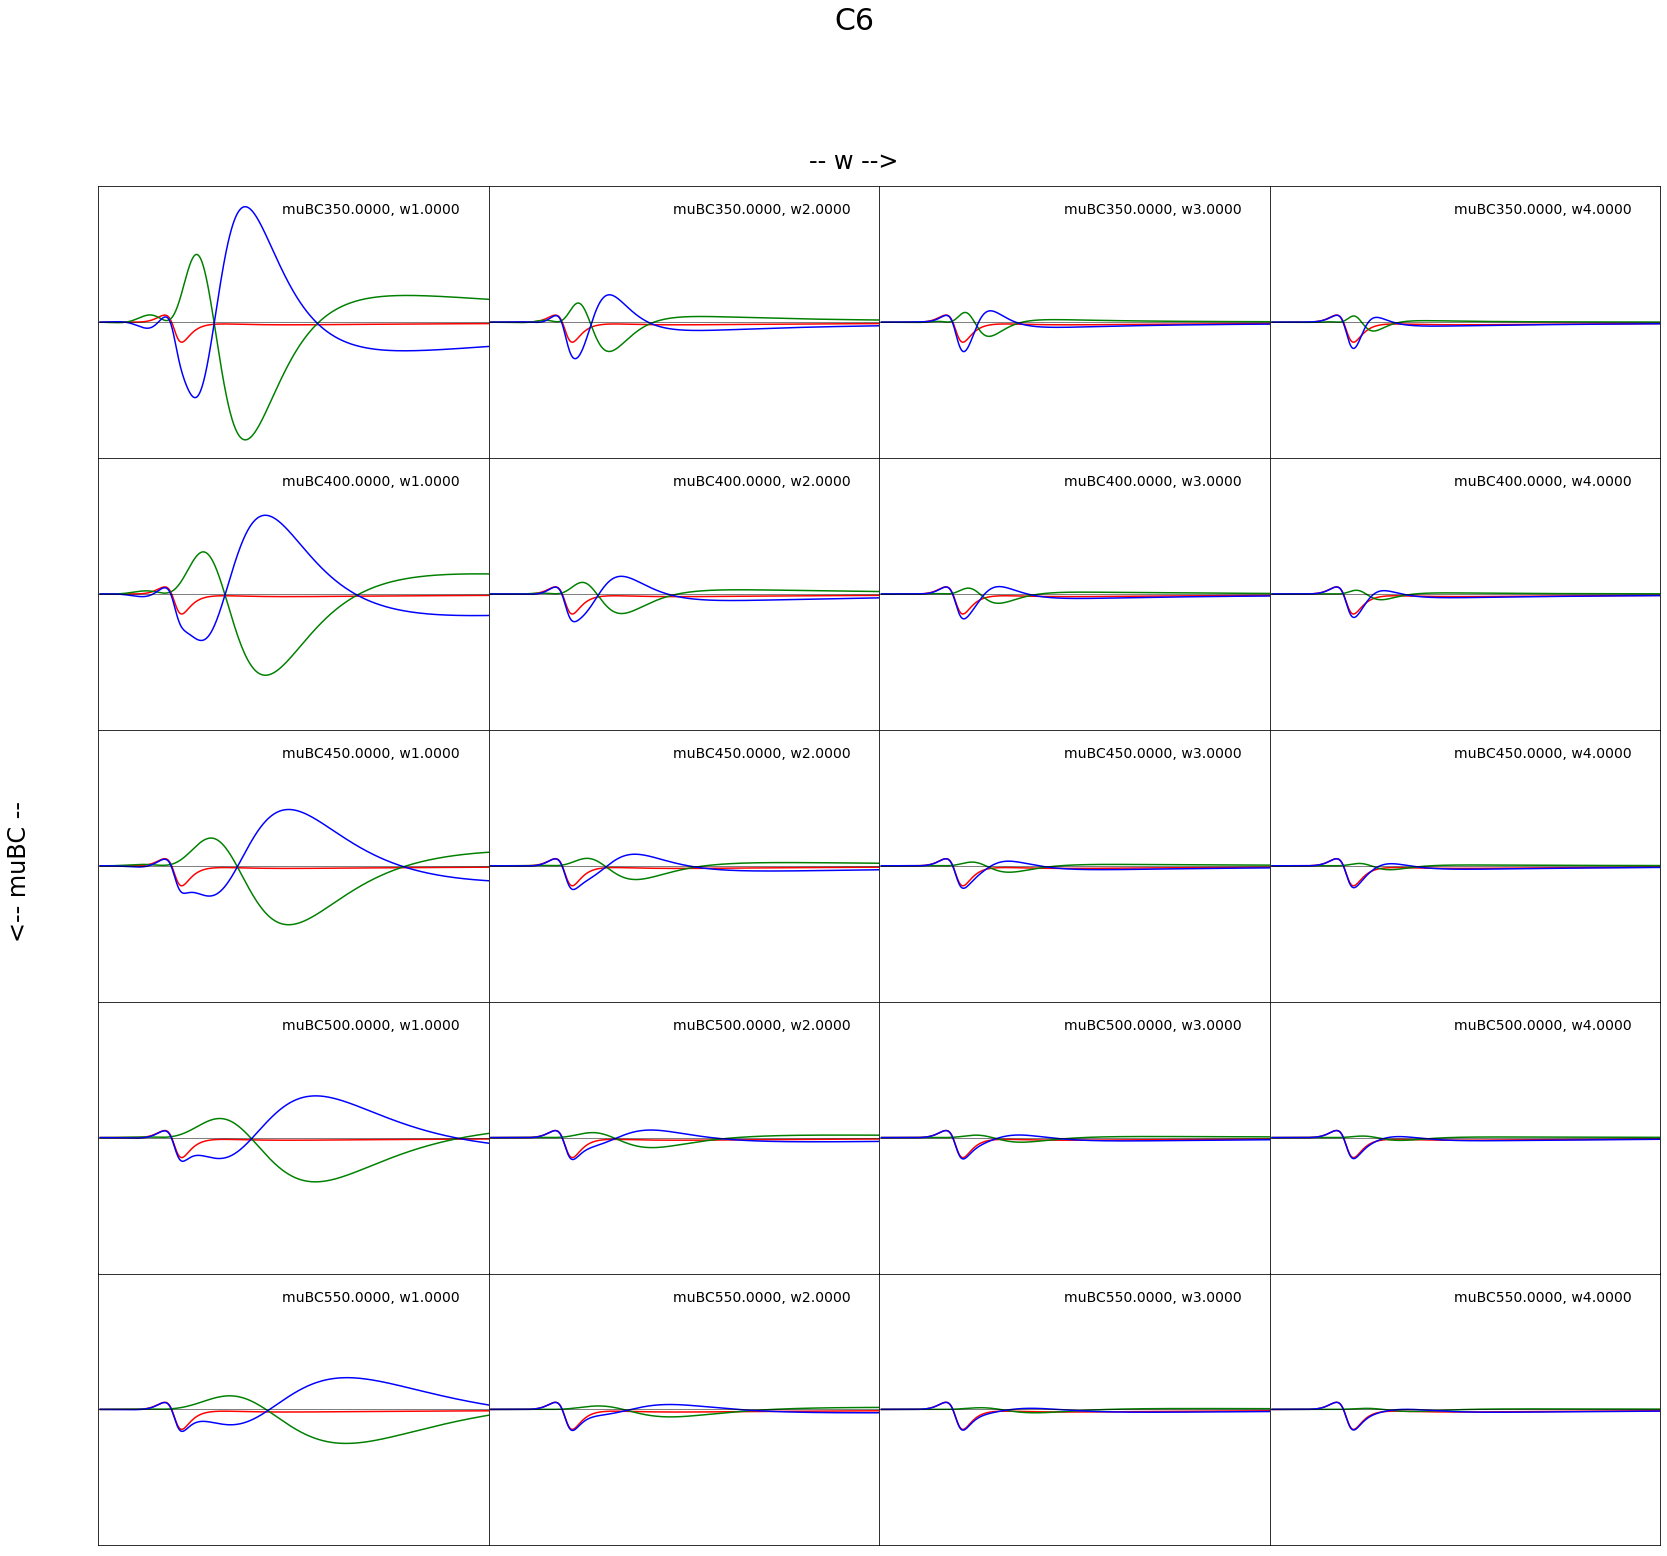

-------------------------------------------------------------------------------


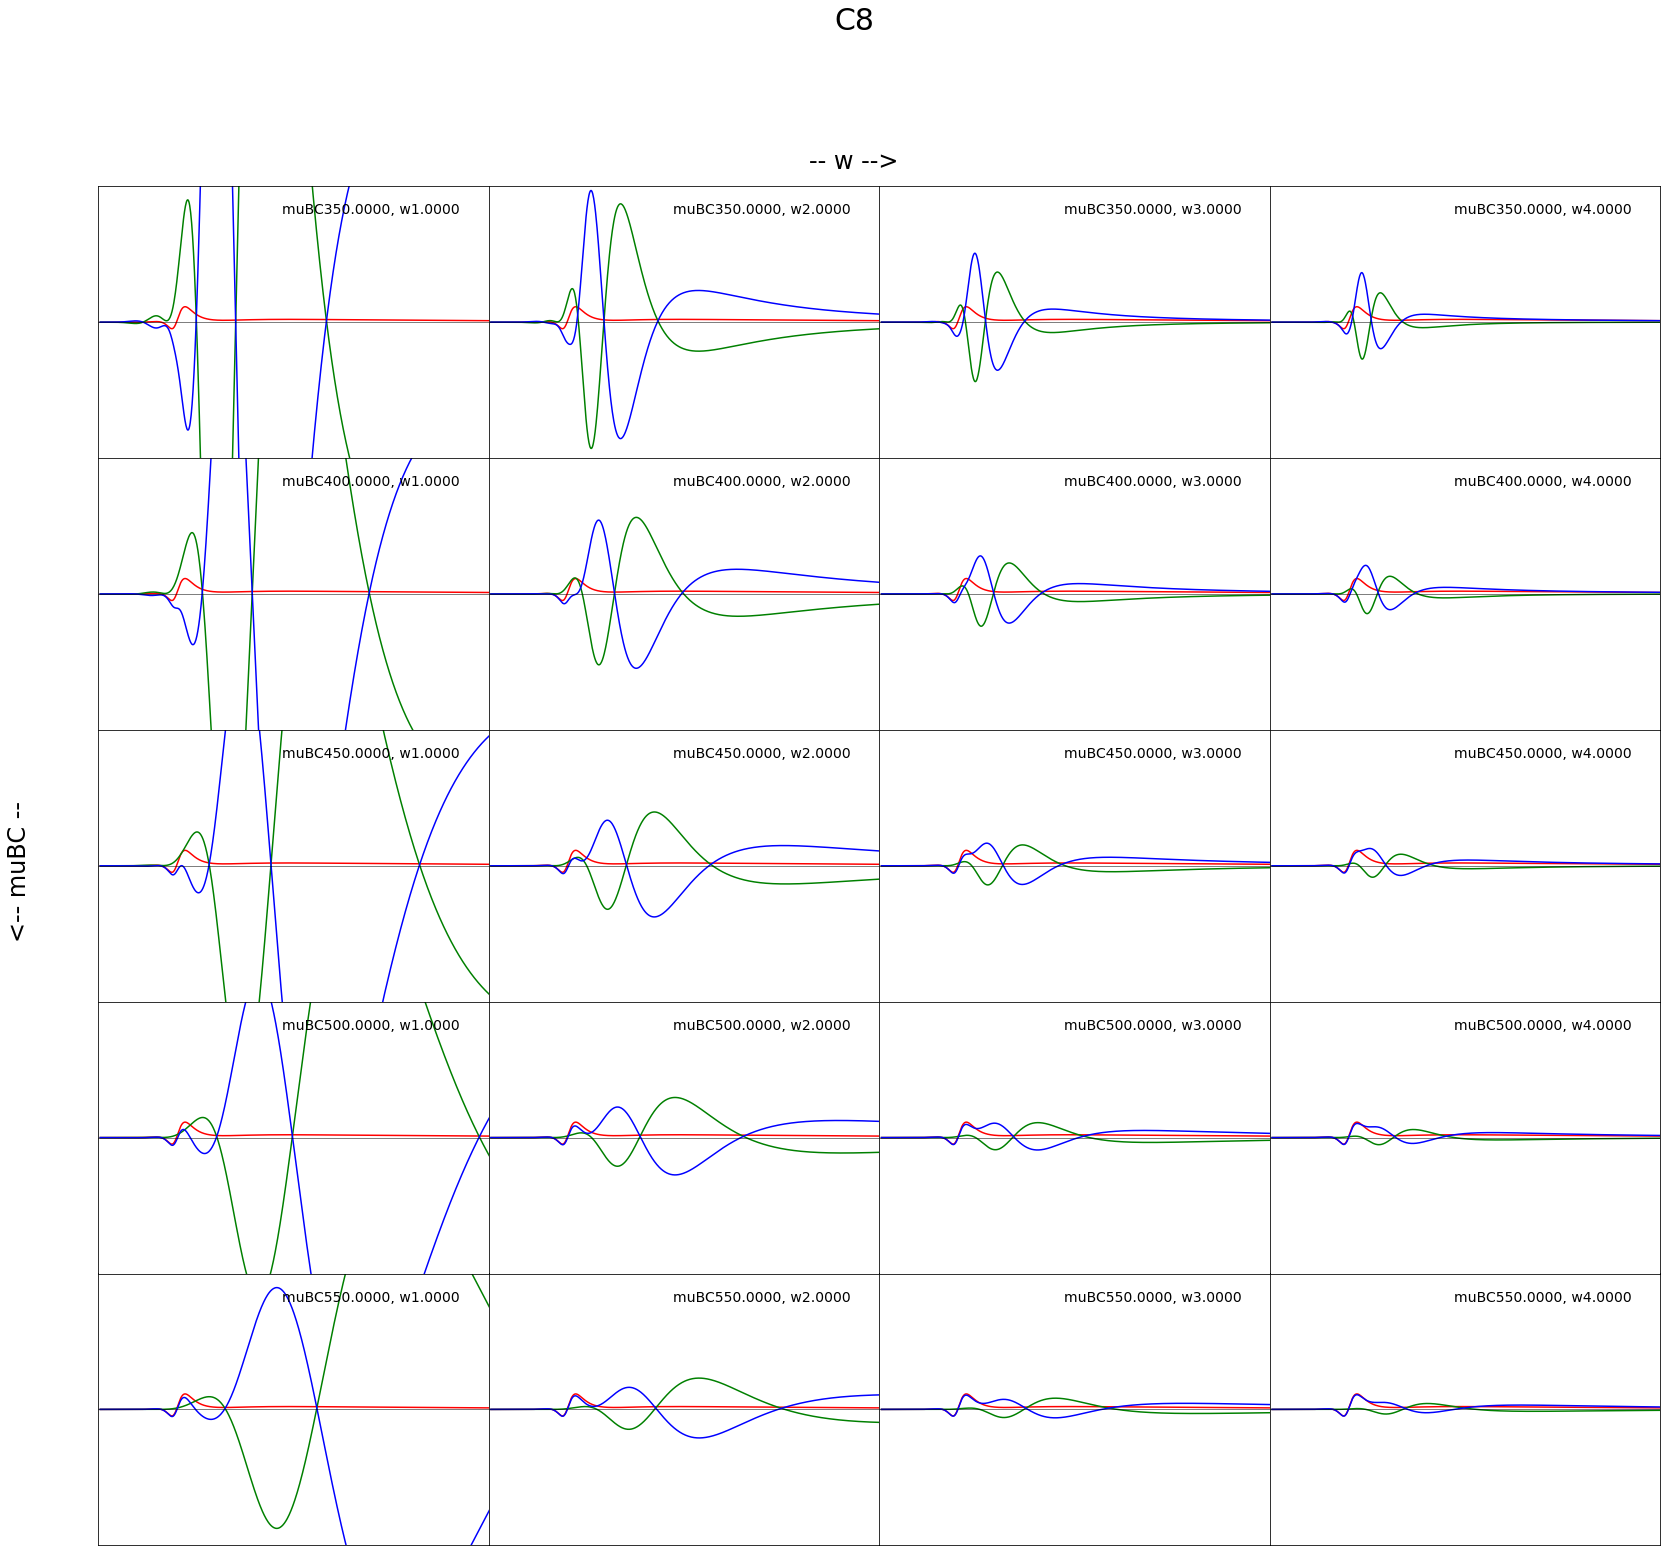

In [4]:
# vertical and horizontal ranges for plots for each coef order
y_ranges_list = [[-2,4],[-.5,.5],[-.01,.1],[-.5,.5],[-2,2],[-10, 10]]
x_ranges_list = [[0,400],[0,400],[0,817],[0,817],[0,817],[0, 817]]

def plotter(c, coef_col): # plotting function, will make all plots in figure
    LAT_col = LAT_alldata[:,coef_col] # get LAT c data from LAT_data
    ylim_bot, ylim_top = y_ranges_list[coef_col-1][0],y_ranges_list[coef_col-1][1]
    xlim_bot, xlim_top = x_ranges_list[coef_col-1][0],x_ranges_list[coef_col-1][1]
    fig, axes = plt.subplots(nrows=row_n, ncols=col_n, figsize=(width,height), sharex='row', sharey='col',subplot_kw=subplotdict,gridspec_kw=gridspecdict)
    for i, ax in enumerate(axes.flatten()):
        ax.text(.7,.9,str(complete_list[i][0])+', '+str(complete_list[i][1]),horizontalalignment='center',fontsize=fontsize_text,transform=ax.transAxes)
        
        # get ising data
        ising_data = np.genfromtxt(reduced_outputs_list[i])
        ising_col = ising_data[:,coef_col]/temp4
        
        # calculate non ising
        nonising_col = LAT_col-ising_col
        
        # plots
        ax.plot(temp, LAT_col ,color='red') # LAT data
        ax.plot(temp, ising_col ,color='green') # Ising data, changed from typically being black
        ax.plot(temp, nonising_col, color='blue') # NonIsing data
        ax.set_ylim([ylim_bot, ylim_top])
        ax.set_xlim([xlim_bot, xlim_top])
        ax.axhline(color='black',lw=0.5)
    fig.text(0.5, 0.89, '-- '+x_label+' -->', ha='center', fontsize=fontsize_label) #xaxis label
    fig.text(0.08, 0.5, '<-- '+y_label+' --', va='center', rotation='vertical',fontsize=fontsize_label) #yaxis label
    fig.suptitle('C'+str(c), x=.5,y=.98,fontsize=30)
    plt.show()


# make the plots. modifications in this section affect general figure appearance. other mods for within the plots can be made in plotter()
col_n,row_n = len(xvals),len(yvals)
width, height = 7*col_n,5*row_n # this give figure size depending on how many cols and rows, simple change coefficients here to change figsize
fontsize_label = 24
fontsize_text = 14
gridspecdict = {"wspace":0,"hspace":0}
subplotdict = {"xticks":[], "yticks":[]}

# run plotter up to number of coef order desired
coef_col = 1
for c in range(0,cnum+2,2):       
    print('-------------------------------------------------------------------------------')
    plotter(c, coef_col)
    coef_col += 1